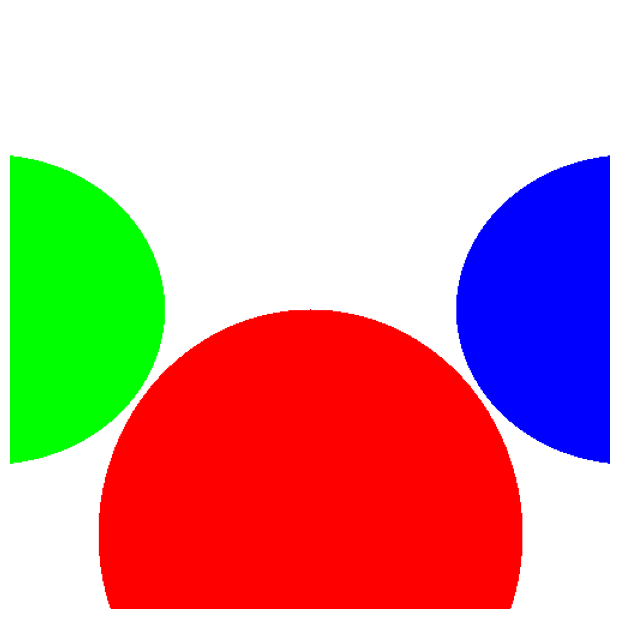

In [5]:
import numpy as np
import matplotlib.pyplot as plt

class Sphere:
    def __init__(self, center, radius, color):
        self.center = np.array(center)
        self.radius = radius
        self.color = np.array(color)

    def intersects(self, ray_origin, ray_direction):
        # Calculate intersection of ray and sphere
        oc = ray_origin - self.center
        a = np.dot(ray_direction, ray_direction)
        b = 2 * np.dot(oc, ray_direction)
        c = np.dot(oc, oc) - self.radius ** 2

        discriminant = b ** 2 - 4 * a * c
        if discriminant < 0:
            return False, None
        t1 = (-b - np.sqrt(discriminant)) / (2 * a)
        t2 = (-b + np.sqrt(discriminant)) / (2 * a)
        return True, min(t1, t2) if t1 > 0 else t2


def trace_ray(ray_origin, ray_direction, spheres):
    closest_t = float('inf')
    closest_sphere = None

    for sphere in spheres:
        intersects, t = sphere.intersects(ray_origin, ray_direction)
        if intersects and t < closest_t:
            closest_t = t
            closest_sphere = sphere

    if closest_sphere is None:
        return np.array([255, 255, 255])  # Background color: white

    return closest_sphere.color  # Return sphere color


def render_image(width, height, viewport_size, projection_plane_d, spheres):
    aspect_ratio = width / height
    image = np.zeros((height, width, 3), dtype=np.uint8)
    camera = np.array([0, 0, 0])  # Camera position

    for x in range(width):
        for y in range(height):
            # Convert pixel coordinate to viewport coordinate
            px = (x - width / 2) * viewport_size / width
            py = -(y - height / 2) * viewport_size / height  # Flip Y axis
            ray_direction = np.array([px, py, projection_plane_d])
            ray_direction = ray_direction / np.linalg.norm(ray_direction)  # Normalize

            # Trace the ray and get the color
            color = trace_ray(camera, ray_direction, spheres)
            image[y, x] = np.clip(color, 0, 255)

    return image


if __name__ == "__main__":
    # Scene setup
    viewport_size = 1.0
    projection_plane_d = 1.0
    width, height = 500, 500

    spheres = [
        Sphere(center=(0, -1, 3), radius=1, color=(255, 0, 0)),  # Red sphere
        Sphere(center=(2, 0, 4), radius=1, color=(0, 0, 255)),  # Blue sphere
        Sphere(center=(-2, 0, 4), radius=1, color=(0, 255, 0))  # Green sphere
    ]

    # Render the image
    image = render_image(width, height, viewport_size, projection_plane_d, spheres)

    # Display the image without borders
    plt.figure(figsize=(6, 6), dpi=100)
    plt.imshow(image)
    plt.axis('off')  # Turn off axes
    plt.gca().set_position([0, 0, 1, 1])  # Remove padding
    plt.show()


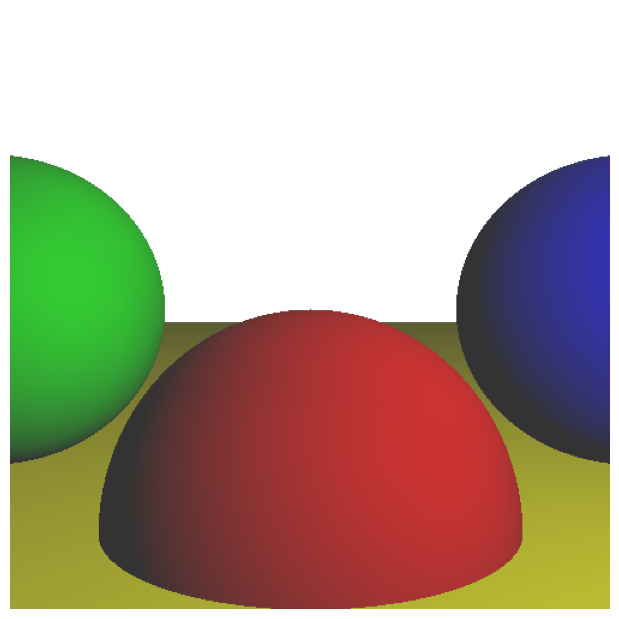

In [6]:
import numpy as np
import matplotlib.pyplot as plt

class Sphere:
    def __init__(self, center, radius, color):
        self.center = np.array(center)
        self.radius = radius
        self.color = np.array(color)

    def intersects(self, ray_origin, ray_direction):
        # Calculate intersection of ray and sphere
        oc = ray_origin - self.center
        a = np.dot(ray_direction, ray_direction)
        b = 2 * np.dot(oc, ray_direction)
        c = np.dot(oc, oc) - self.radius ** 2

        discriminant = b ** 2 - 4 * a * c
        if discriminant < 0:
            return False, None, None
        t1 = (-b - np.sqrt(discriminant)) / (2 * a)
        t2 = (-b + np.sqrt(discriminant)) / (2 * a)
        t = min(t1, t2) if t1 > 0 else t2

        if t > 0:
            # Calculate intersection point and normal
            point = ray_origin + ray_direction * t
            normal = (point - self.center) / self.radius  # Normal at the intersection point
            return True, t, normal
        return False, None, None

class Light:
    def __init__(self, light_type, intensity, position=None, direction=None):
        self.type = light_type
        self.intensity = intensity
        self.position = np.array(position) if position else None
        self.direction = np.array(direction) if direction else None

def trace_ray(ray_origin, ray_direction, spheres, lights):
    closest_t = float('inf')
    closest_sphere = None
    closest_normal = None

    for sphere in spheres:
        intersects, t, normal = sphere.intersects(ray_origin, ray_direction)
        if intersects and t < closest_t:
            closest_t = t
            closest_sphere = sphere
            closest_normal = normal

    if closest_sphere is None:
        return np.array([255, 255, 255])  # Background color: white

    # Shading calculation based on lights
    color = np.zeros(3)

    # 1. Ambient light
    ambient_intensity = 0.2
    color += ambient_intensity * np.array([255, 255, 255])  # Ambient light is white

    # 2. Point light
    for light in lights:
        if light.type == 'point':
            light_direction = light.position - (ray_origin + ray_direction * closest_t)
            light_direction = light_direction / np.linalg.norm(light_direction)

            # Diffuse shading (Lambertian reflection)
            diffuse_intensity = max(np.dot(closest_normal, light_direction), 0)
            color += light.intensity * diffuse_intensity * closest_sphere.color

        # 3. Directional light
        if light.type == 'directional':
            light_direction = light.direction / np.linalg.norm(light.direction)

            # Diffuse shading (Lambertian reflection)
            diffuse_intensity = max(np.dot(closest_normal, light_direction), 0)
            color += light.intensity * diffuse_intensity * closest_sphere.color

    # Clip the color values to be between 0 and 255
    return np.clip(color, 0, 255)

def render_image(width, height, viewport_size, projection_plane_d, spheres, lights):
    aspect_ratio = width / height
    image = np.zeros((height, width, 3), dtype=np.uint8)
    camera = np.array([0, 0, 0])  # Camera position

    for x in range(width):
        for y in range(height):
            # Convert pixel coordinate to viewport coordinate
            px = (x - width / 2) * viewport_size / width
            py = -(y - height / 2) * viewport_size / height  # Flip Y axis
            ray_direction = np.array([px, py, projection_plane_d])
            ray_direction = ray_direction / np.linalg.norm(ray_direction)  # Normalize

            # Trace the ray and get the color
            color = trace_ray(camera, ray_direction, spheres, lights)
            image[y, x] = np.clip(color, 0, 255)

    return image

if __name__ == "__main__":
    # Scene setup
    viewport_size = 1.0
    projection_plane_d = 1.0
    width, height = 500, 500

    # Define spheres
    spheres = [
        Sphere(center=(0, -1, 3), radius=1, color=(255, 0, 0)),  # Red sphere
        Sphere(center=(2, 0, 4), radius=1, color=(0, 0, 255)),  # Blue sphere
        Sphere(center=(-2, 0, 4), radius=1, color=(0, 255, 0)),  # Green sphere
        Sphere(center=(0, -5001, 0), radius=5000, color=(255, 255, 0))  # Yellow giant sphere
    ]

    # Define lights
    lights = [
        Light(light_type='ambient', intensity=0.2),
        Light(light_type='point', intensity=0.6, position=(2, 1, 0)),
        Light(light_type='directional', intensity=0.2, direction=(1, 4, 4))
    ]

    # Render the image
    image = render_image(width, height, viewport_size, projection_plane_d, spheres, lights)

    # Display the image without borders
    plt.figure(figsize=(6, 6), dpi=100)
    plt.imshow(image)
    plt.axis('off')  # Turn off axes
    plt.gca().set_position([0, 0, 1, 1])  # Remove padding
    plt.show()


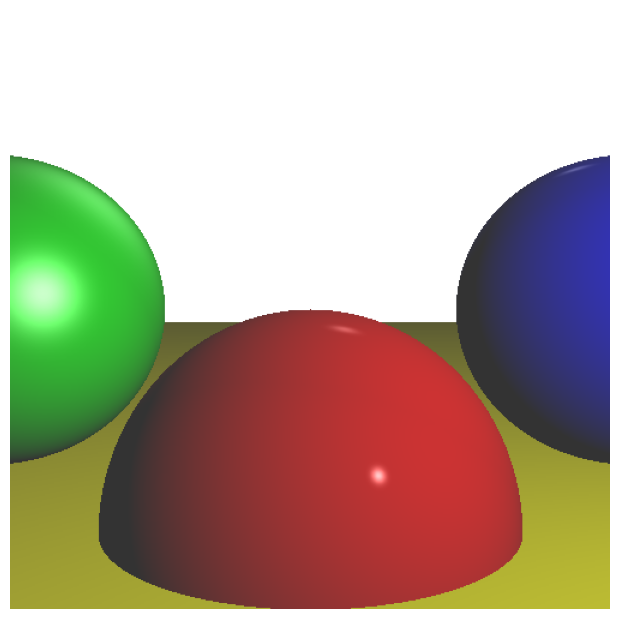

In [11]:
import numpy as np
import matplotlib.pyplot as plt

class Sphere:
    def __init__(self, center, radius, color, specular=0):
        self.center = np.array(center)
        self.radius = radius
        self.color = np.array(color)
        self.specular = specular  # Specular shininess exponent

    def intersects(self, ray_origin, ray_direction):
        # Calculate intersection of ray and sphere
        oc = ray_origin - self.center
        a = np.dot(ray_direction, ray_direction)
        b = 2 * np.dot(oc, ray_direction)
        c = np.dot(oc, oc) - self.radius ** 2

        discriminant = b ** 2 - 4 * a * c
        if discriminant < 0:
            return False, None, None
        t1 = (-b - np.sqrt(discriminant)) / (2 * a)
        t2 = (-b + np.sqrt(discriminant)) / (2 * a)
        t = min(t1, t2) if t1 > 0 else t2

        if t > 0:
            # Calculate intersection point and normal
            point = ray_origin + ray_direction * t
            normal = (point - self.center) / self.radius  # Normal at the intersection point
            return True, t, normal
        return False, None, None

class Light:
    def __init__(self, light_type, intensity, position=None, direction=None):
        self.type = light_type
        self.intensity = intensity
        self.position = np.array(position) if position else None
        self.direction = np.array(direction) if direction else None

def trace_ray(ray_origin, ray_direction, spheres, lights, camera_position):
    closest_t = float('inf')
    closest_sphere = None
    closest_normal = None

    for sphere in spheres:
        intersects, t, normal = sphere.intersects(ray_origin, ray_direction)
        if intersects and t < closest_t:
            closest_t = t
            closest_sphere = sphere
            closest_normal = normal

    if closest_sphere is None:
        return np.array([255, 255, 255])  # Background color: white

    # Shading calculation based on lights
    color = np.zeros(3)

    # 1. Ambient light
    ambient_intensity = 0.2
    color += ambient_intensity * np.array([255, 255, 255])  # Ambient light is white

    # 2. Point light and Directional light
    for light in lights:
        if light.type == 'point':
            light_direction = light.position - (ray_origin + ray_direction * closest_t)
            light_direction = light_direction / np.linalg.norm(light_direction)

            # Diffuse shading (Lambertian reflection)
            diffuse_intensity = max(np.dot(closest_normal, light_direction), 0)
            color += light.intensity * diffuse_intensity * closest_sphere.color

        elif light.type == 'directional':
            light_direction = light.direction / np.linalg.norm(light.direction)

            # Diffuse shading (Lambertian reflection)
            diffuse_intensity = max(np.dot(closest_normal, light_direction), 0)
            color += light.intensity * diffuse_intensity * closest_sphere.color

        # 3. Specular reflection
        if closest_sphere.specular > 0:
            if light.type in ['point', 'directional']:  # Ensure light direction is available
                # Calculate the reflection vector
                reflection_direction = 2 * np.dot(light_direction, closest_normal) * closest_normal - light_direction
                reflection_direction = reflection_direction / np.linalg.norm(reflection_direction)
                
                # View direction
                view_direction = camera_position - (ray_origin + ray_direction * closest_t)
                view_direction = view_direction / np.linalg.norm(view_direction)

                # Specular component (Phong model)
                specular_intensity = max(np.dot(view_direction, reflection_direction), 0) ** closest_sphere.specular
                color += light.intensity * specular_intensity * np.array([255, 255, 255])  # White specular reflection

    # Clip the color values to be between 0 and 255
    return np.clip(color, 0, 255)

def render_image(width, height, viewport_size, projection_plane_d, spheres, lights, camera_position):
    aspect_ratio = width / height
    image = np.zeros((height, width, 3), dtype=np.uint8)

    for x in range(width):
        for y in range(height):
            # Convert pixel coordinate to viewport coordinate
            px = (x - width / 2) * viewport_size / width
            py = -(y - height / 2) * viewport_size / height  # Flip Y axis
            ray_direction = np.array([px, py, projection_plane_d])
            ray_direction = ray_direction / np.linalg.norm(ray_direction)  # Normalize

            # Trace the ray and get the color
            color = trace_ray(camera_position, ray_direction, spheres, lights, camera_position)
            image[y, x] = np.clip(color, 0, 255)

    return image

if __name__ == "__main__":
    # Scene setup
    viewport_size = 1.0
    projection_plane_d = 1.0
    width, height = 500, 500
    camera_position = np.array([0, 0, 0])  # Camera position

    # Define spheres with specular properties
    spheres = [
        Sphere(center=(0, -1, 3), radius=1, color=(255, 0, 0), specular=500),  # Red sphere (shiny)
        Sphere(center=(2, 0, 4), radius=1, color=(0, 0, 255), specular=500),  # Blue sphere (shiny)
        Sphere(center=(-2, 0, 4), radius=1, color=(0, 255, 0), specular=10),  # Green sphere (less shiny)
        Sphere(center=(0, -5001, 0), radius=5000, color=(255, 255, 0), specular=1000)  # Yellow giant sphere (very shiny)
    ]

    # Define lights
    lights = [
        Light(light_type='ambient', intensity=0.2),
        Light(light_type='point', intensity=0.6, position=(2, 1, 0)),
        Light(light_type='directional', intensity=0.2, direction=(1, 4, 4))
    ]

    # Render the image
    image = render_image(width, height, viewport_size, projection_plane_d, spheres, lights, camera_position)

    # Display the image without borders
    plt.figure(figsize=(6, 6), dpi=100)
    plt.imshow(image)
    plt.axis('off')  # Turn off axes
    plt.gca().set_position([0, 0, 1, 1])  # Remove padding
    plt.show()


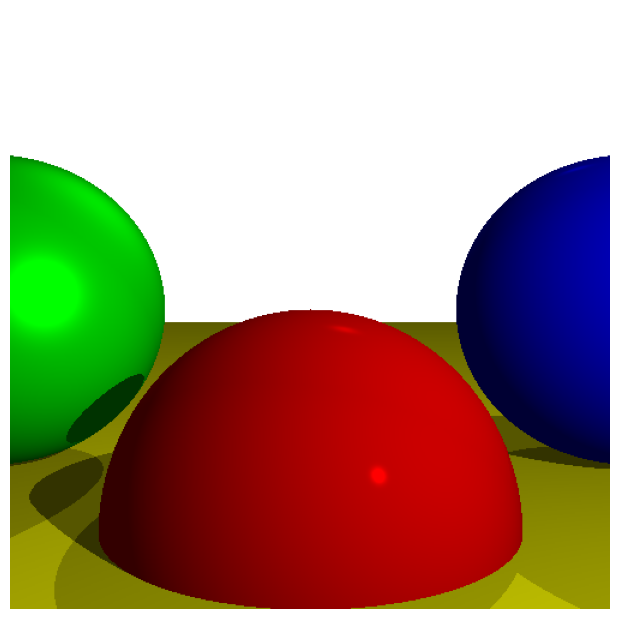

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class Sphere:
    def __init__(self, center, radius, color, specular=0):
        self.center = np.array(center)
        self.radius = radius
        self.color = np.array(color)
        self.specular = specular

    def intersects(self, ray_origin, ray_direction):
        oc = ray_origin - self.center
        a = np.dot(ray_direction, ray_direction)
        b = 2 * np.dot(oc, ray_direction)
        c = np.dot(oc, oc) - self.radius ** 2
        discriminant = b ** 2 - 4 * a * c

        if discriminant < 0:
            return None, None

        t1 = (-b - np.sqrt(discriminant)) / (2 * a)
        t2 = (-b + np.sqrt(discriminant)) / (2 * a)
        return t1, t2

def closest_intersection(ray_origin, ray_direction, t_min, t_max, spheres):
    closest_t = float('inf')
    closest_sphere = None

    for sphere in spheres:
        t1, t2 = sphere.intersects(ray_origin, ray_direction)

        if t1 is not None and t_min < t1 < t_max and t1 < closest_t:
            closest_t = t1
            closest_sphere = sphere

        if t2 is not None and t_min < t2 < t_max and t2 < closest_t:
            closest_t = t2
            closest_sphere = sphere

    return closest_sphere, closest_t

def compute_lighting(point, normal, view, specular, lights, spheres):
    intensity = 0.0

    for light in lights:
        if light['type'] == 'ambient':
            intensity += light['intensity']
        else:
            if light['type'] == 'point':
                light_dir = light['position'] - point
                t_max = 1
            elif light['type'] == 'directional':
                light_dir = light['direction']
                t_max = float('inf')

            light_dir = light_dir / np.linalg.norm(light_dir)

            # Shadow check
            shadow_sphere, shadow_t = closest_intersection(point, light_dir, 0.001, t_max, spheres)
            if shadow_sphere is not None:
                continue

            # Diffuse shading
            n_dot_l = np.dot(normal, light_dir)
            if n_dot_l > 0:
                intensity += light['intensity'] * n_dot_l

            # Specular reflection
            if specular != -1:
                reflection = 2 * normal * np.dot(normal, light_dir) - light_dir
                r_dot_v = np.dot(reflection, view)
                if r_dot_v > 0:
                    intensity += light['intensity'] * (r_dot_v ** specular)

    return intensity

def trace_ray(ray_origin, ray_direction, t_min, t_max, spheres, lights):
    closest_sphere, closest_t = closest_intersection(ray_origin, ray_direction, t_min, t_max, spheres)

    if closest_sphere is None:
        return np.array([255, 255, 255])  # Background color

    point = ray_origin + closest_t * ray_direction
    normal = (point - closest_sphere.center) / closest_sphere.radius
    view = -ray_direction

    lighting = compute_lighting(point, normal, view, closest_sphere.specular, lights, spheres)
    color = closest_sphere.color * lighting

    return np.clip(color, 0, 255)

def render_image(width, height, viewport_size, projection_plane_d, spheres, lights, camera_position):
    aspect_ratio = width / height
    image = np.zeros((height, width, 3), dtype=np.uint8)

    for x in range(width):
        for y in range(height):
            px = (x - width / 2) * viewport_size / width
            py = -(y - height / 2) * viewport_size / height
            ray_direction = np.array([px, py, projection_plane_d])
            ray_direction = ray_direction / np.linalg.norm(ray_direction)

            color = trace_ray(camera_position, ray_direction, 0.001, float('inf'), spheres, lights)
            image[y, x] = color

    return image

if __name__ == "__main__":
    # Scene setup
    viewport_size = 1.0
    projection_plane_d = 1.0
    width, height = 500, 500
    camera_position = np.array([0, 0, 0])

    # Spheres
    spheres = [
        Sphere(center=(0, -1, 3), radius=1, color=(255, 0, 0), specular=500),
        Sphere(center=(2, 0, 4), radius=1, color=(0, 0, 255), specular=500),
        Sphere(center=(-2, 0, 4), radius=1, color=(0, 255, 0), specular=10),
        Sphere(center=(0, -5001, 0), radius=5000, color=(255, 255, 0), specular=1000)
    ]

    # Lights
    lights = [
        {'type': 'ambient', 'intensity': 0.2},
        {'type': 'point', 'intensity': 0.6, 'position': np.array([2, 1, 0])},
        {'type': 'directional', 'intensity': 0.2, 'direction': np.array([1, 4, 4])}
    ]

    # Render the image
    image = render_image(width, height, viewport_size, projection_plane_d, spheres, lights, camera_position)

    # Display the image
    plt.figure(figsize=(6, 6), dpi=100)
    plt.imshow(image)
    plt.axis('off')
    plt.gca().set_position([0, 0, 1, 1])
    plt.show()


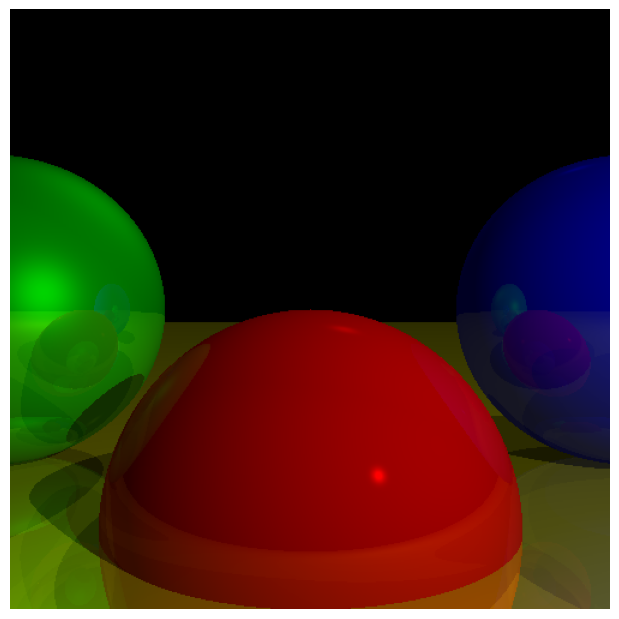

In [9]:
import numpy as np
import matplotlib.pyplot as plt

class Sphere:
    def __init__(self, center, radius, color, specular=0, reflective=0):
        self.center = np.array(center)
        self.radius = radius
        self.color = np.array(color)
        self.specular = specular
        self.reflective = reflective

    def intersects(self, ray_origin, ray_direction):
        oc = ray_origin - self.center
        a = np.dot(ray_direction, ray_direction)
        b = 2 * np.dot(oc, ray_direction)
        c = np.dot(oc, oc) - self.radius ** 2
        discriminant = b ** 2 - 4 * a * c

        if discriminant < 0:
            return None, None

        t1 = (-b - np.sqrt(discriminant)) / (2 * a)
        t2 = (-b + np.sqrt(discriminant)) / (2 * a)
        return t1, t2

def closest_intersection(ray_origin, ray_direction, t_min, t_max, spheres):
    closest_t = float('inf')
    closest_sphere = None

    for sphere in spheres:
        t1, t2 = sphere.intersects(ray_origin, ray_direction)

        if t1 is not None and t_min < t1 < t_max and t1 < closest_t:
            closest_t = t1
            closest_sphere = sphere

        if t2 is not None and t_min < t2 < t_max and t2 < closest_t:
            closest_t = t2
            closest_sphere = sphere

    return closest_sphere, closest_t

def compute_lighting(point, normal, view, specular, lights, spheres):
    intensity = 0.0

    for light in lights:
        if light['type'] == 'ambient':
            intensity += light['intensity']
        else:
            if light['type'] == 'point':
                light_dir = light['position'] - point
                t_max = 1
            elif light['type'] == 'directional':
                light_dir = light['direction']
                t_max = float('inf')

            light_dir = light_dir / np.linalg.norm(light_dir)

            # Shadow check
            shadow_sphere, shadow_t = closest_intersection(point, light_dir, 0.001, t_max, spheres)
            if shadow_sphere is not None:
                continue

            # Diffuse shading
            n_dot_l = np.dot(normal, light_dir)
            if n_dot_l > 0:
                intensity += light['intensity'] * n_dot_l

            # Specular reflection
            if specular != -1:
                reflection = 2 * normal * np.dot(normal, light_dir) - light_dir
                r_dot_v = np.dot(reflection, view)
                if r_dot_v > 0:
                    intensity += light['intensity'] * (r_dot_v ** specular)

    return intensity

def trace_ray(ray_origin, ray_direction, t_min, t_max, spheres, lights, recursion_depth):
    closest_sphere, closest_t = closest_intersection(ray_origin, ray_direction, t_min, t_max, spheres)

    if closest_sphere is None:
        return np.array([0, 0, 0])  # Background color

    point = ray_origin + closest_t * ray_direction
    normal = (point - closest_sphere.center) / closest_sphere.radius
    view = -ray_direction

    lighting = compute_lighting(point, normal, view, closest_sphere.specular, lights, spheres)
    local_color = closest_sphere.color * lighting

    # Reflective shading
    reflectiveness = closest_sphere.reflective
    if recursion_depth <= 0 or reflectiveness <= 0:
        return np.clip(local_color, 0, 255)

    reflection_direction = ray_direction - 2 * np.dot(ray_direction, normal) * normal
    reflection_color = trace_ray(point, reflection_direction, 0.001, float('inf'), spheres, lights, recursion_depth - 1)

    final_color = (1 - reflectiveness) * local_color + reflectiveness * reflection_color
    return np.clip(final_color, 0, 255)

def render_image(width, height, viewport_size, projection_plane_d, spheres, lights, camera_position):
    aspect_ratio = width / height
    image = np.zeros((height, width, 3), dtype=np.uint8)

    for x in range(width):
        for y in range(height):
            px = (x - width / 2) * viewport_size / width
            py = -(y - height / 2) * viewport_size / height
            ray_direction = np.array([px, py, projection_plane_d])
            ray_direction = ray_direction / np.linalg.norm(ray_direction)

            color = trace_ray(camera_position, ray_direction, 0.001, float('inf'), spheres, lights, recursion_depth=3)
            image[y, x] = color

    return image

if __name__ == "__main__":
    # Scene setup
    viewport_size = 1.0
    projection_plane_d = 1.0
    width, height = 500, 500
    camera_position = np.array([0, 0, 0])

    # Spheres
    spheres = [
        Sphere(center=(0, -1, 3), radius=1, color=(255, 0, 0), specular=500, reflective=0.2),
        Sphere(center=(2, 0, 4), radius=1, color=(0, 0, 255), specular=500, reflective=0.3),
        Sphere(center=(-2, 0, 4), radius=1, color=(0, 255, 0), specular=10, reflective=0.4),
        Sphere(center=(0, -5001, 0), radius=5000, color=(255, 255, 0), specular=1000, reflective=0.5)
    ]

    # Lights
    lights = [
        {'type': 'ambient', 'intensity': 0.2},
        {'type': 'point', 'intensity': 0.6, 'position': np.array([2, 1, 0])},
        {'type': 'directional', 'intensity': 0.2, 'direction': np.array([1, 4, 4])}
    ]

    # Render the image
    image = render_image(width, height, viewport_size, projection_plane_d, spheres, lights, camera_position)

    # Display the image
    plt.figure(figsize=(6, 6), dpi=100)
    plt.imshow(image)
    plt.axis('off')
    plt.gca().set_position([0, 0, 1, 1])
    plt.show()
